In [1]:
#%matplotlib widget #need this for click GUIs
import qubic.toolchain as tc
import qubic.run as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
from chipcalibration import t1meas
from importlib import reload
import qubic.state_disc as sd

In [2]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
qchip = qc.QChip('X4Y2_punchout_20230403.json')
chanmap = {'Q0':2,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':7}

channel_config = load_channel_configs('channel_config.json')

In [3]:
runner = rc.CircuitRunner()

In [4]:
reload(t1meas)
qubits = ['Q2']
elementlength = 80
elementstep = 2e-6
i_t1meas = t1meas.t1meas(qubits, elementlength, elementstep, qchip, fpga_config, channel_config)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


In [5]:
i_t1meas.circuits

[[{'name': 'X90', 'qubit': ['Q2']},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'delay', 't': 0.0},
  {'name': 'read', 'qubit': ['Q2']},
  {'name': 'delay', 't': 0.0004},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'delay', 't': 2e-06},
  {'name': 'read', 'qubit': ['Q2']},
  {'name': 'delay', 't': 0.0004},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'delay', 't': 4e-06},
  {'name': 'read', 'qubit': ['Q2']},
  {'name': 'delay', 't': 0.0004},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'delay', 't': 6e-06},
  {'name': 'read', 'qubit': ['Q2']},
  {'name': 'delay', 't': 0.0004},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'delay', 't': 8e-06},
  {'name': 'read', 'qubit': ['Q2']},
  {'name': 'delay', 't': 0.0004},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'X90', 'qubit': ['Q2']},
  {'name': 'delay', 't': 9.999999999999999e-06},
 

In [6]:
i_t1meas.run(runner, 1000)

nshot 12
navg 84
1 (80, 1008)


In [7]:
#debug

In [8]:
reload(sd)
gmm = sd.GMMManager(chanmap_or_chan_cfgs=channel_config)

In [9]:
gmm.fit(i_t1meas.s11)

In [10]:
result = gmm.predict(i_t1meas.s11)

In [11]:
#gmm.set_labels_maxtomin({chan: shots[0].flatten() 
#                                      for chan, shots in chevron.s11.items()}, [0, 1])

In [12]:
state_disc_shots = gmm.predict(i_t1meas.s11)
#plt.plot(t1meas.result)
#plt.show()

In [13]:
#ones_frac = {qubit: np.sum(state_disc_shots[qubit], axis=2) for qubit in state_disc_shots.keys()}

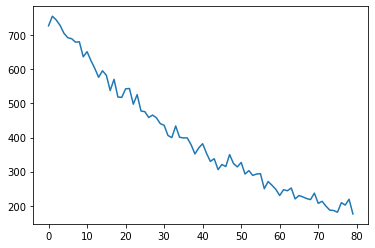

In [14]:
#plt.pcolormesh(ones_frac['Q1'])
plt.plot(i_t1meas.ones_frac['Q2'])
plt.show()